## The Assumptions Of Linear Regression, And How To Test Them
### BANCO DE DADOS: Variable descriptions for the high-frequency water temperature and dissolved oxygen data set from 12 lakes.
#### 
Reference: Pilla et al. (in review). Comparing winter versus summer deepwater dissolved oxygen depletion with the potential for cross-seasonal


##### The Ordinary Least Squares regression model (a.k.a. the linear regression model) is a simple and powerful model that can be used on many real world data sets. The OLSR model is based on strong theoretical foundations. It’s predictions are explainable and defensible. to get the most out of an OLSR model, we need to make and verify the following four assumptions:

- The residual errors of regression should be independent, identically distributed random variables.
- The residual errors should be normally distributed.
- The response variable y should be linearly related to the explanatory variable X.
- The residual errors should have constant variance, i.e. they should be homoscedastic.cedastic.

##### Assumption 1: Linear functional form

###### How to test the linearity assumption using Python

In [4]:
import pandas as pd
from patsy import dmatrices
from matplotlib import pyplot as plt
import numpy as np

# Carregando o arquivo modificado
caminho_arquivo_modificado = "C:\\Users\\edinei.acm\\ENS410064_OK\\ENS410064\\Dados\\Atividade2\\DepTempDO.csv"
df = pd.read_csv(caminho_arquivo_modificado, parse_dates=['Date'], dayfirst=True,  date_format='%m/%Y')
df.set_index('Date', inplace=True)

df

,Lake,MeasurementDepth_m,WaterTemp_degC,DissolvedOxygen_mgL
Date,,,,
2010-04-24,Cimera,9.0,4.331111,0.962222
2010-04-25,Cimera,9.0,4.390833,0.399167
2010-04-26,Cimera,9.0,4.405417,0.248333
2010-04-27,Cimera,9.0,4.414583,0.165000
2010-04-28,Cimera,9.0,4.427083,0.092500
...,...,...,...,...
2019-07-03,Waynewood,9.0,6.241576,0.036778
2019-07-04,Waynewood,9.0,6.235326,0.036861
2019-07-05,Waynewood,9.0,6.271861,0.036868


In [6]:
# Criando um data frame só com o Lago Cimera
CimeraLake = "Cimera"

# Crie um novo DataFrame com os dados apenas para o lago desejado
Cimera_df = df[df["Lake"] == CimeraLake].copy()
Cimera_df

,Lake,MeasurementDepth_m,WaterTemp_degC,DissolvedOxygen_mgL
Date,,,,
2010-04-24,Cimera,9.0,4.331111,0.962222
2010-04-25,Cimera,9.0,4.390833,0.399167
2010-04-26,Cimera,9.0,4.405417,0.248333
2010-04-27,Cimera,9.0,4.414583,0.165000
2010-04-28,Cimera,9.0,4.427083,0.092500
...,...,...,...,...
2015-05-26,Cimera,1.0,9.899583,9.886250
2015-05-27,Cimera,1.0,10.620417,9.734167
2015-05-28,Cimera,1.0,11.268333,9.581250


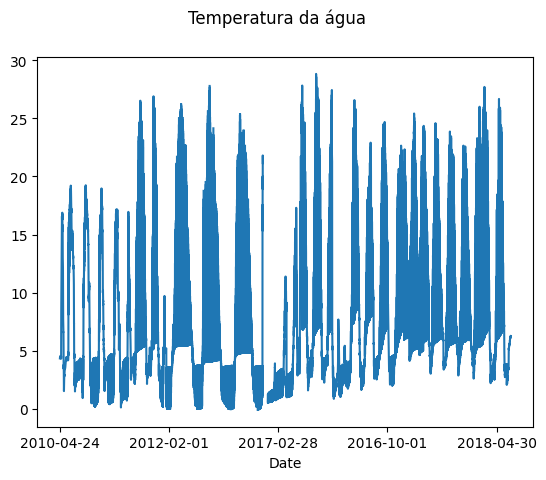

In [10]:
fig = plt.figure()
fig.suptitle('Temperatura da água')
df['WaterTemp_degC'].plot()
plt.show()

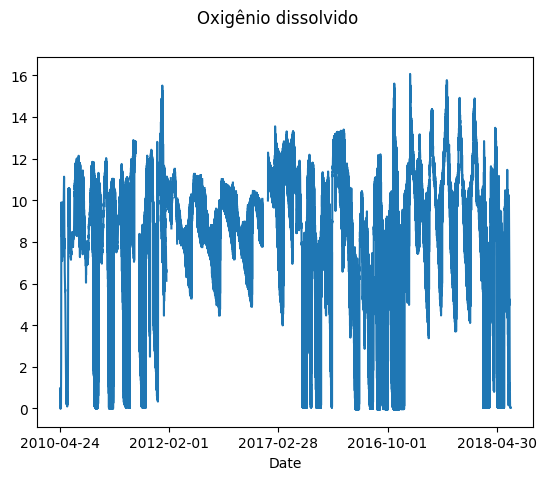

In [12]:
fig = plt.figure()
fig.suptitle('Oxigênio dissolvido')
df['DissolvedOxygen_mgL'].plot()
plt.show()

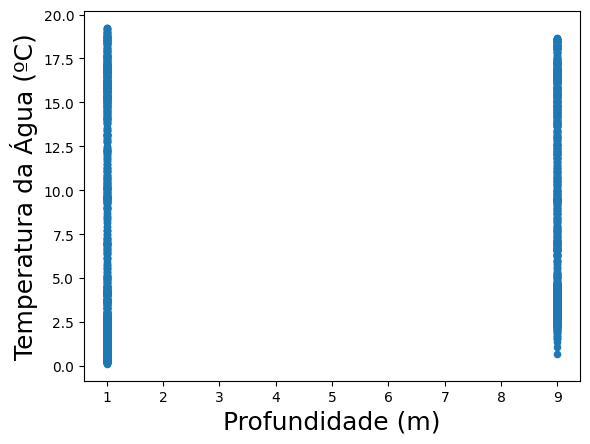

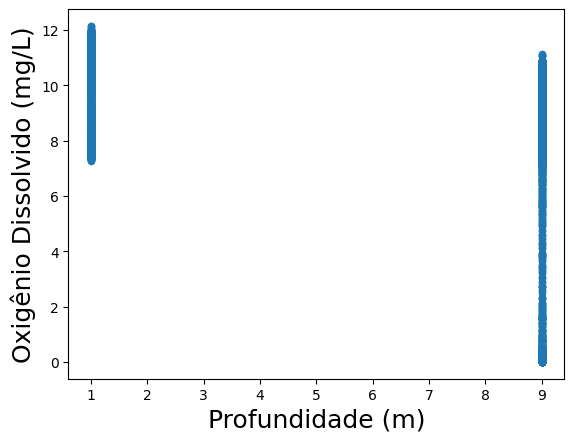

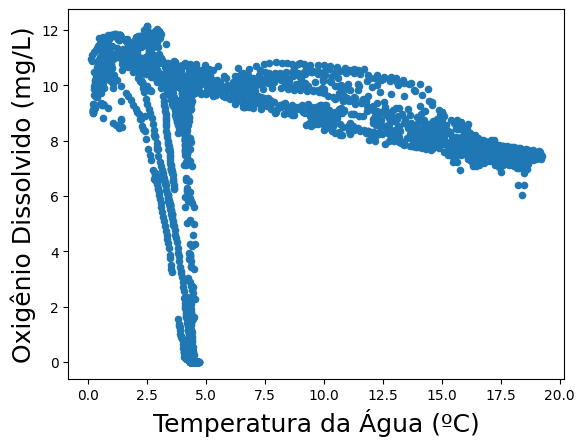

In [22]:
# Scatter plots
Cimera_df.plot.scatter(x='MeasurementDepth_m', y='WaterTemp_degC')
plt.xlabel('Profundidade (m)', fontsize=18)
plt.ylabel('Temperatura da Água (ºC)', fontsize=18)
plt.show()
 
Cimera_df.plot.scatter(x='MeasurementDepth_m', y='DissolvedOxygen_mgL')
plt.xlabel('Profundidade (m)', fontsize=18)
plt.ylabel('Oxigênio Dissolvido (mg/L)', fontsize=18)
plt.show()
 
Cimera_df.plot.scatter(x='WaterTemp_degC', y='DissolvedOxygen_mgL')
plt.xlabel('Temperatura da Água (ºC)', fontsize=18)
plt.ylabel('Oxigênio Dissolvido (mg/L)', fontsize=18)
plt.show()
 


In [38]:
#excluir a coluna Lake (String) para fazer a correlação
Cimera_Corr_df = Cimera_df.drop('Lake', axis=1)
Cimera_Corr_df.corr()['DissolvedOxygen_mgL']

MeasurementDepth_m    -0.500055
WaterTemp_degC        -0.060523
DissolvedOxygen_mgL    1.000000
Name: DissolvedOxygen_mgL, dtype: float64

In [39]:
Cimera_Corr_df.corr()['WaterTemp_degC']

MeasurementDepth_m     0.052768
WaterTemp_degC         1.000000
DissolvedOxygen_mgL   -0.060523
Name: WaterTemp_degC, dtype: float64

In [18]:
# Selecionando apenas uma profundidade

profundidade_selecionada = 1

# Crie um novo DataFrame com as medidas de profundidade igual a 1 metro
cimera_1m_df = Cimera_df[Cimera_df['MeasurementDepth_m'] == profundidade_selecionada].copy()
cimera_1m_df

,Lake,MeasurementDepth_m,WaterTemp_degC,DissolvedOxygen_mgL
Date,,,,
2011-06-18,Cimera,1.0,10.936667,9.476667
2011-06-19,Cimera,1.0,10.850417,9.482500
2011-06-20,Cimera,1.0,11.762500,9.427083
2011-06-21,Cimera,1.0,12.538333,9.395000
2011-06-22,Cimera,1.0,13.031667,9.167083
...,...,...,...,...
2015-05-26,Cimera,1.0,9.899583,9.886250
2015-05-27,Cimera,1.0,10.620417,9.734167
2015-05-28,Cimera,1.0,11.268333,9.581250


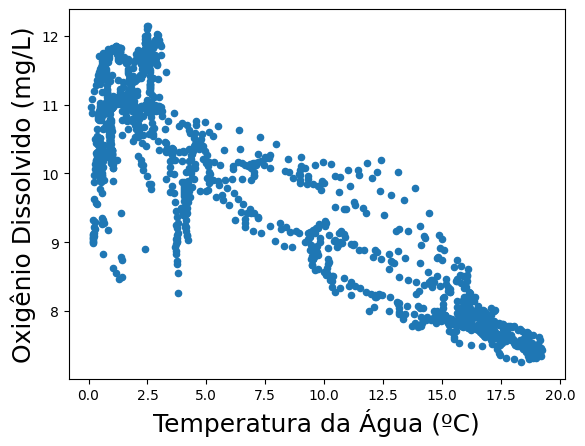

In [21]:
# Scatter plots
cimera_1m_df.plot.scatter(x='WaterTemp_degC', y='DissolvedOxygen_mgL')
plt.xlabel('Temperatura da Água (ºC)', fontsize=18)
plt.ylabel('Oxigênio Dissolvido (mg/L)', fontsize=18)
plt.show()
 

In [26]:
#print out the Pearson’s ‘r’:

correlacao = cimera_1m_df['DissolvedOxygen_mgL'].corr(cimera_1m_df['WaterTemp_degC'])
print("Correlação entre Oxigênio Dissolvido e Temperatura:", correlacao)


Correlação entre Oxigênio Dissolvido e Temperatura: -0.8808133889082778


#### ASSUMPTION 2 - Residual error
##### How to test for independence of residual errors?

In [40]:
# We’ll start by creating the model expression using the Patsy library 
model_expr='DissolvedOxygen_mgL~WaterTemp_degC'
y, X = dmatrices(model_expr, cimera_1m_df, return_type='dataframe')
# exemplo model_expr = 'Power_Output ~ Ambient_Temp + Exhaust_Volume + Ambient_Pressure + Relative_Humidity'

#Let’s also carve out the train and test data sets. The training data set will be 80% of the size of the overall (y, X) and the rest will be the testing data set:

mask = np.random.rand(len(X)) < 0.8
X_train = X[mask]
y_train = y[mask]
X_test = X[~mask]
y_test = y[~mask]

In [44]:
#Finally, build and train an Ordinary Least Squares Regression Model (OLSR) on the training data and print the model summary:
import statsmodels.api as sm

olsr_results = sm.OLS(y_train, X_train).fit()
print('Training completed')

print(olsr_results.summary())

Training completed
                             OLS Regression Results                            
Dep. Variable:     DissolvedOxygen_mgL   R-squared:                       0.775
Model:                             OLS   Adj. R-squared:                  0.775
Method:                  Least Squares   F-statistic:                     3891.
Date:                 Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                         10:08:33   Log-Likelihood:                -1141.2
No. Observations:                 1131   AIC:                             2286.
Df Residuals:                     1129   BIC:                             2296.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      

In [45]:
# Predição
olsr_predictions = olsr_results.get_prediction(X_test)
prediction_summary_frame = olsr_predictions.summary_frame()
print(prediction_summary_frame)

                mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
Date                                                                         
2011-06-19  9.010145  0.023998       8.963058       9.057232      7.705935   
2011-06-21  8.681500  0.027337       8.627864       8.735137      7.377038   
2011-06-27  8.077349  0.034745       8.009178       8.145520      6.772208   
2011-06-28  8.047413  0.035140       7.978465       8.116361      6.742232   
2011-06-30  7.995654  0.035830       7.925354       8.065955      6.690401   
...              ...       ...            ...            ...           ...   
2015-05-17  9.496176  0.020597       9.455763       9.536588      8.192190   
2015-05-18  9.374729  0.021231       9.333072       9.416386      8.070704   
2015-05-22  9.316074  0.021594       9.273706       9.358442      8.012026   
2015-05-24  9.199089  0.022417       9.155105       9.243073      7.894988   
2015-05-28  8.928775  0.024763       8.880189       8.977361    

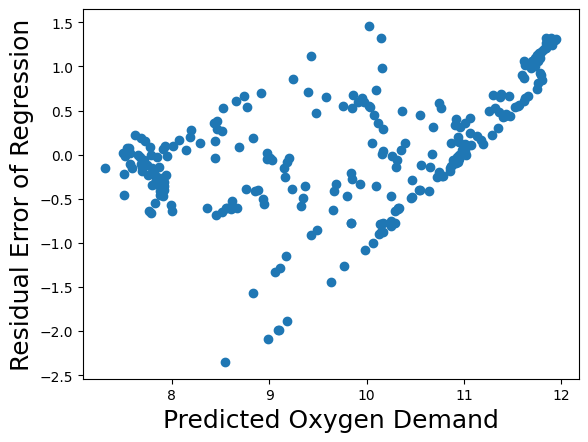

In [48]:
#Let’s calculate the residual errors of regression ε = (y_test — y_pred):

resid = y_test['DissolvedOxygen_mgL'] - prediction_summary_frame['mean']

#gráfico resíduo x valor predito
plt.xlabel('Predicted Oxygen Demand', fontsize=18)
plt.ylabel('Residual Error of Regression', fontsize=18)
plt.scatter(y_test['DissolvedOxygen_mgL'], resid)
plt.show()


#### Assumption 3 - Residual errors should be normally distributed

###### How to test for normality of residual errors?

In [49]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
 
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
 
#run the Jarque-Bera test for Normality on the residuals vector
test = sms.jarque_bera(resid)
 
#print out the test results. This will also print the Skewness and Kurtosis of the resid vector
lzip(name, test)

[('Jarque-Bera test', 16.48004954656762),
 ('Chi-squared(2) p-value', 0.00026387771225628757),
 ('Skewness', -0.3934907715733942),
 ('Kurtosis', 3.9284464545557256)]

###### Valores baixos de valor-p e desvios significativos da normalidade, indicados por Skewness e Kurtosis, podem sugerir que os dados não seguem uma distribuição normal.
###### Jarque-Bera Test: . Se a amostra for normal, o valor do teste Jarque-Bera será próximo de zero. Valores maiores indicam desvios da normalidade.
###### Chi-squared(2) p-value: Esse é o valor-p associado ao teste qui-quadrado com 2 graus de liberdade. O valor-p é usado para determinar se a amostra de dados é consistentemente diferente de uma distribuição normal. Um valor-p baixo (geralmente menor que 0,05) indica que a amostra não segue uma distribuição normal.
###### Skewness: A assimetria é uma medida estatística que descreve o grau de assimetria da distribuição dos dados. Um valor de skewness próximo de zero sugere que a distribuição é aproximadamente simétrica. Valores positivos indicam uma cauda longa à direita, enquanto valores negativos indicam uma cauda longa à esquerda.
###### Kurtosis: A curtose é uma medida estatística que descreve o grau de "achatamento" ou "picosidade" da distribuição dos dados. Um valor de curtose igual a 3 é típico de uma distribuição normal. Valores maiores indicam um pico mais acentuado e caudas mais pesadas, enquanto valores menores indicam um achatamento da distribuição.

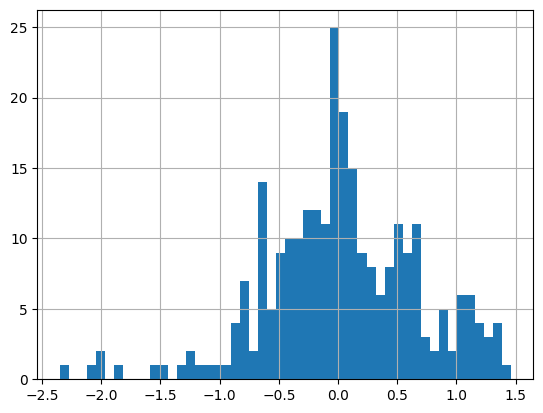

In [50]:
# frequency distribution
resid.hist(bins=50)
plt.show()

#### Assumption 4: Residual errors should be homoscedastic

###### A homoscedasticidade é desejável, pois pressupõe que os erros são igualmente dispersos em todos os níveis das variáveis independentes, enquanto a heteroscedasticidade indica que a dispersão dos erros varia em diferentes partes dos dados ou com base nas variáveis independentes. Detectar e corrigir a heteroscedasticidade é importante para garantir a validade dos resultados de um modelo estatístico.

##### Testing for heteroscedastic variance using Python

In [51]:
from statsmodels.stats.diagnostic import het_white
 
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
 
#run the White test
results = het_white(resid, X_test)
 
#print the results. We will get to see the values of two test-statistics and the corresponding p-values
lzip(keys, results)


[('Lagrange Multiplier statistic:', 21.42348358835418),
 ("LM test's p-value:", 2.2281767959803834e-05),
 ('F-statistic:', 11.515351202891507),
 ("F-test's p-value:", 1.6038939449500825e-05)]

###### F-test p value is much smaller than 0.01; So we reject the null hypothesis of the F-test that the residuals errors of the Oxygen demand model are homoscedastic and accept the alternate hypothesis that the residual errors of the model are heteroscedastic.